### 数据预处理

1. 文本评论，尝试筛选Star：1和Star：5 取值样本各1W条，做2分类模型设计
2. 文本长度取合理范围
3. 关于停用词，标点、其它无关符号

In [1]:
import csv
from tqdm import tqdm

pos_cnt, neg_cnt = 0,0
comments, labels = [],[]

with open('DMSC.csv') as f:
    reader = csv.DictReader(f) 
    for item in tqdm(reader):
        comment = item['Comment']
        star = int(item['Star'])
        if star in [1,5] and 15 <= len(comment) <= 150:
            comments.append(comment)
            labels.append(1 if star == 5 else 0)  # 1 正样本 0 负样本

            

2125056it [00:16, 128443.19it/s]


In [2]:
len(comments)

547840

In [3]:
# 统计评论文本长度
cmt_lens = [len(cmt) for cmt in comments]

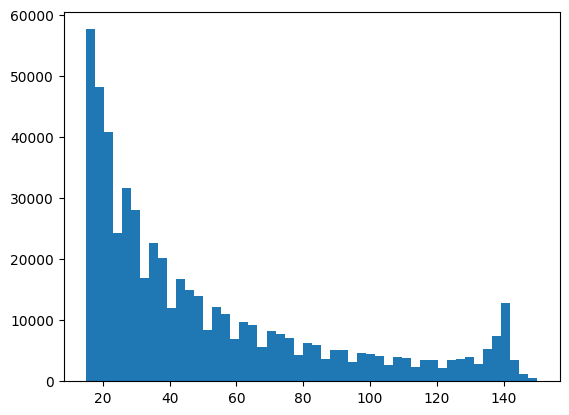

In [4]:
import matplotlib.pyplot as plt

plt.hist(cmt_lens, bins=50)
plt.show()

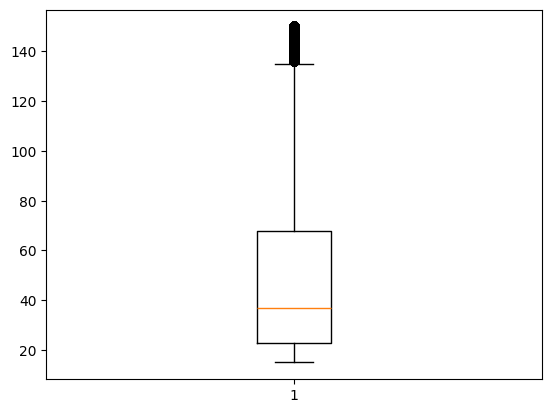

In [5]:
plt.boxplot(cmt_lens)
plt.show()

In [6]:
# 筛选无关标点符号、格式控制符号
comments = [cmt.replace('。',' ').replace('，',' ') for cmt in comments]

In [7]:
# 结巴分词
import jieba
comments_jieba = [' '.join(jieba.cut(cmt)) for cmt in comments]

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.552 seconds.
Prefix dict has been built successfully.


In [8]:
comments_jieba[:10]

['  什么 破烂 反派   毫无 戏剧 冲突 能 消耗 两个 多 小时 生命   还 强加 爱情 戏   脑 残片 好 圈钱 倒 是 真的  ',
 '  机甲 之战 超超 好看   比 变形金刚 强 ； 人   神   变异 人   人工智能 互殴   强强 强强 ； 每 一小 段末句 都 是 槽 或者 笑点   应该 死 了 不少 编剧 ； Jane 不来 客串   雷神 没露   扣分 ； 女神 配 怪兽   fair   enough ； 美国 队长 我 最 喜欢 他 的 盾   大概 因为 紫龙 ； 难得 人物 多次 发表 演讲 还 不 死 ； 最后   找到 了 下半年 新发型   开心 ！',
 '  说实话 其实 剧情 就 那样 吧   非漫 威粉 看着 可能 有 的 地方 会 get 不到 G 点 吧   （ 其实 漫威 卖 的 不是 剧情 而是 人物 和 世界观 呀   漫威 宇宙 棒棒 哒 ） 但 对于 漫威粉 来说 真是 全程 高能 + IMAX 燃爆 啊 ！ # 漫威 大法 好 #',
 '  没有 了 洛基 这个 小基仔 真是 觉得 即墨 如雪 啊',
 '  看毕   我 激动 地 对 友人 说   等等 奥创 要 来 毁灭 台北 怎么办 厚   她 拍了拍 我 肩膀   没事   反正 你 买 了 两份 旅行 保险   惹 ......',
 '  不 出 意料 得烂   喜欢 这部 电影 的 孩子   大概 也 喜欢 变 4 … …',
 '  哪个 保证 一刀 不 剪 的   不是 剪 了 好几刀 吗 ！',
 '  真的 是 全程无 尿点   漫威 在 拍 了 这么 多 系列片 之后 再 拿捏 妇联 2 真是 得心应手   笑点 爆发 点齐飞   拿 锤子 的 哽太 伤人   233   唯一 遗憾   没 洛基',
 '  绝逼 不 质疑 尾灯 的 导演 和 编剧 水平    ',
 '  赶上 第一波 看好 开心 ！ 大乱斗 超 好评 ！ ！ ！ 总之 笑料 和 精彩 程度 都 不减 ！ 所有 的 BG 线 都 让 人 尴尬 到 内心 崩溃   寡姐 和 Hulk 在 一起 时   简直 就是 是 超级 宠物 教练   猩红 女巫 和 快 银 也 都 是 萌萌萌 ！ 我 有 好多 嘈想 吐   但 我 不能 剧透   麻蛋

In [9]:
# sentencepiec 分词
import sentencepiece as spm
sp = spm.SentencePieceProcessor()

with open('comments.txt', 'w', encoding='utf-8') as f:
    for cmt in comments:
        f.write(cmt + '\n')

# 分词模型训练
spm.SentencePieceTrainer.Train(
    input='comments.txt', model_prefix='spm_model', vocab_size=5000,)

sentencepiece_trainer.cc(78) LOG(INFO) Starts training with : 
trainer_spec {
  input: comments.txt
  input_format: 
  model_prefix: spm_model
  model_type: UNIGRAM
  vocab_size: 5000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  seed_sentencepieces_file: 
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
  enable_differential_privacy: 0
  diff

In [10]:
# 读取分词模型
sp.Load('spm_model.model')
# 分词
comments_spm = []
for cmt in comments:
    cmt_spm = sp.EncodeAsPieces(cmt)
    comments_spm.append(' '.join(cmt_spm))

comments_spm[:10]

['▁ 什么 破 烂 反 派 ▁ 毫 无 戏 剧 冲 突 能 消 耗 两个 多 小 时 生 命 ▁ 还 强 加 爱情 戏 ▁ 脑 残 片 好 圈 钱 倒 是 真的',
 '▁ 机 甲 之 战 超 超 好看 ▁ 比 变 形 金 刚 强 ; 人 ▁ 神 ▁ 变 异 人 ▁ 人 工 智 能 互 殴 ▁ 强 强 强 强 ; 每 一 小 段 末 句 都是 槽 或 者 笑点 ▁ 应该 死 了 不 少 编 剧 ; J an e 不 来 客 串 ▁ 雷 神 没 露 ▁ 扣 分 ; 女 神 配 怪 兽 ▁ f a i r ▁ e n o u g h ; 美 国 队 长 我 最 喜欢 他 的 盾 ▁ 大 概 因为 紫 龙 ; 难 得 人物 多 次 发 表 演 讲 还 不 死 ; 最后 ▁ 找 到了 下 半 年 新 发 型 ▁ 开 心 !',
 '▁ 说 实 话 其 实 剧情 就 那 样 吧 ▁ 非 漫 威 粉 看 着 可能 有 的 地 方 会 g e t 不 到 G 点 吧 ▁ ( 其 实 漫 威 卖 的 不是 剧情 而 是 人物 和 世界 观 呀 ▁ 漫 威 宇 宙 棒 棒 哒 ) 但 对 于 漫 威 粉 来说 真是 全程 高 能 + I M A X 燃 爆 啊 ! # 漫 威 大 法 好 #',
 '▁没有 了 洛 基 这个 小 基 仔 真是 觉得 即 墨 如 雪 啊',
 '▁ 看 毕 ▁我 激 动 地 对 友 人 说 ▁ 等 等 奥 创 要 来 毁 灭 台 北 怎么 办 厚 ▁ 她 拍 了 拍 我 肩 膀 ▁ 没 事 ▁ 反 正 你 买 了 两 份 旅 行 保 险 ▁ 惹 ......',
 '▁ 不 出 意 料 得 烂 ▁ 喜欢 这部电影 的 孩 子 ▁ 大 概 也 喜欢 变 4 ......',
 '▁ 哪 个 保 证 一 刀 不 剪 的 ▁ 不是 剪 了 好 几 刀 吗 !',
 '▁ 真的是 全程 无 尿 点 ▁ 漫 威 在 拍 了 这么 多 系 列 片 之后 再 拿 捏 妇 联 2 真是 得 心 应 手 ▁ 笑点 爆 发 点 齐 飞 ▁ 拿 锤 子 的 哽 太 伤 人 ▁ 2 3 3 ▁ 唯 一 遗 憾 ▁ 没 洛 基',
 '▁ 绝 逼 不 质 疑 尾 灯 的 导演 和 编 剧 水 平',
 '▁ 赶 上 第 一 波 看 好 开 心 ! 大 乱 斗 超 好 评 !!

In [11]:
import pickle

with open('comments_jieba.bin', 'wb') as f:
    pickle.dump((comments_jieba, labels), f)

with open('comments_spm.bin', 'wb') as f:
    pickle.dump((comments_spm, labels), f)

print('语料处理保存完成！')

语料处理保存完成！
